In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
sys.path.append(os.path.abspath(''))

In [2]:



import pandas as pd
import numpy as np
import jsonlines
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from importlib import reload
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', '{:0.3f}'.format)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.width = 0
import warnings
warnings.filterwarnings('ignore')
import facebook_hateful_memes_detector
reload(facebook_hateful_memes_detector)

from facebook_hateful_memes_detector.utils import read_json_lines_into_df, in_notebook
from facebook_hateful_memes_detector.models import GensimLangFeatures1DCNNModel
from facebook_hateful_memes_detector.preprocessing import TextImageDataset, my_collate, get_datasets, get_basic_image_transforms
from facebook_hateful_memes_detector.training import *



Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
preprocess = get_basic_image_transforms()

In [5]:
data = get_datasets(data_dir="../data/", train_text_transform=None, train_image_transform=preprocess, 
                 test_text_transform=None, test_image_transform=preprocess, 
                 cache_images = True, use_images = False, dev=False)

https://discuss.pytorch.org/t/how-to-implement-torch-optim-lr-scheduler-cosineannealinglr/28797/11

## GensimLangFeatures1DCNNModel

In [10]:
model_fn = model_builder(GensimLangFeatures1DCNNModel, 
                         dict(classifer_dims=512, num_classes=2, embedding_dims=700,
                              gaussian_noise=0.25, dropout=0.25, internal_dims=512,
                             fasttext_file="crawl-300d-2M-subword.bin", capabilities=["spacy"]),
                         optimiser_class=torch.optim.Adam, optimiser_params=dict(lr=0.001, weight_decay=1e-9))





In [ ]:
n_tests = 1
batch_size=512
epochs = 5
results, prfs = train_validate_ntimes(model_fn, data, n_tests, batch_size, epochs)
results
prfs
# 12m 10s

In [8]:
results
prfs

train   val
mean_or_std metric               
mean        f1_micro  0.715 0.713
            map       0.631 0.614
            accuracy  0.715 0.713
            auc       0.732 0.725
std         f1_micro  0.000 0.000
            map       0.000 0.000
            accuracy  0.000 0.000
            auc       0.000 0.000

train                             val                      
    precision recall    f1  supoort precision recall    f1  supoort
neg     0.768  0.794 0.781 4347.000     0.775  0.786 0.780 1103.000
pos     0.611  0.575 0.592 2453.000     0.594  0.578 0.586  597.000

## Predict

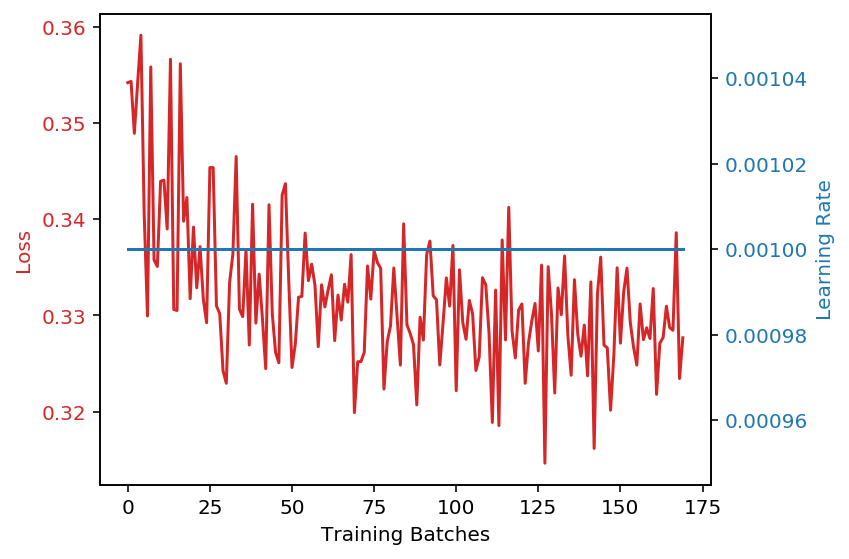

,id,proba,label
0,16395,0.368,0
1,37405,0.368,0
2,94180,0.371,0


In [7]:
batch_size=512
epochs = 10

submission = train_and_predict(model_fn, data, batch_size, epochs)
submission.to_csv("submission.csv",index=False)
submission.head(3)


In [11]:
submission.sample(10)

,id,proba,label
130,20815,0.215477,0
957,68230,0.518263,1
304,83091,0.150450,0
67,93251,0.538929,1
769,10956,0.389160,0
265,98170,0.212233,0
683,48570,0.452380,0
850,84360,0.399557,0
24,17209,0.573945,1
52,4958,0.609207,1
